### crawling data

In [77]:
import tweepy
import os
import pandas as pd

In [78]:
consumer_key = "" 
consumer_secret = "" 
access_token = ""
access_token_secret = ""

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [79]:
Query = "Wacana Presiden 3 Periode -filter:links"
Start_Date = "2022-2-20"
End_Date = "2022-04-20"

In [80]:
tweets = tweepy.Cursor(api.search_tweets,
              q=Query,
              lang="id",
              since= Start_Date,
              Until = End_Date).items(1000)

In [81]:
User_locs = [[tweet.user.screen_name,tweet.user.description,tweet.user.location,tweet.text,tweet.favorite_count,tweet.retweet_count,]for tweet in tweets]

Value = pd.DataFrame(data = User_locs,columns = ['User Name','Description_user','Location','Tweet','Likes','Retweet'])

Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter

In [82]:
Value

,User Name,Description_user,Location,Tweet,Likes,Retweet
0,klarick26,mari bung rebut kembali!!,,"Besok Demo,\nWacana perpanjangan atau 3 periode Presiden itu yg paling berdampak itu Parpol dan elit politik, mau di… https://t.co/iqXIFX4SqJ",0,0
1,RadiGhozali,Fish Lover,,"@abangbelneg Wacana Presiden 3 Periode, Jokowi Waspadai hasutan KADRUN #SayaBersamaJokowi #KamiBersamaJokowi",0,0
2,AdheMaradona,Developer Bangunan di Cileungsi\n#BerantasMafiaTanah,,"@abangbelneg Wacana Presiden 3 Periode, Jokowi Waspadai hasutan KADRUN #SayaBersamaJokowi #KamiBersamaJokowi",0,0
3,AdheMaradona,Developer Bangunan di Cileungsi\n#BerantasMafiaTanah,,"@sasasayatusa_ Wacana Presiden 3 Periode, Jokowi Waspadai hasutan KADRUN #SayaBersamaJokowi #KamiBersamaJokowi",0,0
4,AnangLord,Muscle Man,"Tanah Abang, Indonesia","@sasasayatusa_ Wacana Presiden 3 Periode, Jokowi Waspadai hasutan Luhut #SayaBersamaJokowi #KamiBersamaJokowi",0,0
...,...,...,...,...,...,...
995,sundakeras98,"Pecinta Muhammad Rasullah SAW , Penghobi Sepatu Boots, USA ( Urang Sunda Asli ) Anti Cebong , Anti PKI , Anti Liberal, Anti Atheis, Anti LGBT 👞😎","Cianjur, Indonesia","RT @JimlyAs: Karna public distrust yg luas thdp prnyataan2 ""stop wacana tunda pmilu &amp; prpanjangan masa jbtn presiden"", kini saatnya bicara…",0,816
996,YogiBaskoro0,Rumbling,"Cilacap, Jawa Tengah","RT @ridwankamil: Termasuk wacana yang sempat menghangat sebelum demo hari ini, terkait perpanjangan jabatan presiden jadi 3 periode, yang t…",0,40
997,citrrrrra,,,RT @rido_trio: @GiaPratamaMD Saya kasih gambaran sedikit pak\n1. Setiap orang berhak berada di lokasi demonstrasi\n2. Ade Armando di lokasi k…,0,30
998,EJat3010,Keep SocMed Healthy,,"@hnurwahid Hentikan gaduh, tp sendirinya tiap hr goreng isi ini.. jgn cmn nolak di medsos, datengin tuh BEM SI yg k… https://t.co/LEDfri5CfN",2,0


### preprocess

In [83]:
import pandas as pd
import nltk
import re
import emoji
import numpy as np

In [84]:
pd.set_option('display.max_colwidth', 1200)

In [85]:
dataset = Value.drop(columns = ['User Name','Description_user','Location','Likes','Retweet'])
dataset.to_csv('Project_Sentimen.csv',index = False)

In [86]:
Dataset = pd.read_csv("Project_Sentimen.csv")
Dataset

,Tweet
0,"Besok Demo,\nWacana perpanjangan atau 3 periode Presiden itu yg paling berdampak itu Parpol dan elit politik, mau di… https://t.co/iqXIFX4SqJ"
1,"@abangbelneg Wacana Presiden 3 Periode, Jokowi Waspadai hasutan KADRUN #SayaBersamaJokowi #KamiBersamaJokowi"
2,"@abangbelneg Wacana Presiden 3 Periode, Jokowi Waspadai hasutan KADRUN #SayaBersamaJokowi #KamiBersamaJokowi"
3,"@sasasayatusa_ Wacana Presiden 3 Periode, Jokowi Waspadai hasutan KADRUN #SayaBersamaJokowi #KamiBersamaJokowi"
4,"@sasasayatusa_ Wacana Presiden 3 Periode, Jokowi Waspadai hasutan Luhut #SayaBersamaJokowi #KamiBersamaJokowi"
...,...
995,"RT @JimlyAs: Karna public distrust yg luas thdp prnyataan2 ""stop wacana tunda pmilu &amp; prpanjangan masa jbtn presiden"", kini saatnya bicara…"
996,"RT @ridwankamil: Termasuk wacana yang sempat menghangat sebelum demo hari ini, terkait perpanjangan jabatan presiden jadi 3 periode, yang t…"
997,RT @rido_trio: @GiaPratamaMD Saya kasih gambaran sedikit pak\n1. Setiap orang berhak berada di lokasi demonstrasi\n2. Ade Armando di lokasi k…
998,"@hnurwahid Hentikan gaduh, tp sendirinya tiap hr goreng isi ini.. jgn cmn nolak di medsos, datengin tuh BEM SI yg k… https://t.co/LEDfri5CfN"


In [87]:
def preprocessing(tweets):
    tweets = tweets.encode('ascii','ignore').decode('utf-8')
    tweets = re.sub(r'[^\x00-\x7f]',r'',tweets)
    tweets = re.sub(r'[_(){}[]]+','',tweets)
    tweets = re.sub(r'@[A-Za-z0-9]+','',tweets)
    tweets = re.sub(r'#[A-Za-z0-9]+','',tweets)
    tweets = re.sub(r'_[A-Za-z0-9]+','',tweets)
    tweets = re.sub(r'-[A-Za-z0-9]+','',tweets)
    tweets = re.sub(r':[A-Za-z0-9]+','',tweets)
    tweets = re.sub(r'https?:\/\/\S+','',tweets)
    tweets = re.sub(r'\d+','',tweets)
    tweets = re.sub(r'@+','',tweets)
    tweets = re.sub(r':+','',tweets)
    tweets = re.sub(r',+','',tweets)
    tweets = re.sub(r'_+','',tweets)
    tweets = tweets.lower()
    allemot = [str for str in tweets]
    listemot = [x for x in allemot if x in emoji.UNICODE_EMOJI]
    tweets = ' '.join([str for str in tweets.split()if not any (y in str for str in listemot)])
    return tweets

Dataset['Tweet'] = Dataset['Tweet'].apply(preprocessing)
Dataset

,Tweet
0,besok demo wacana perpanjangan atau periode presiden itu yg paling berdampak itu parpol dan elit politik mau di
1,wacana presiden periode jokowi waspadai hasutan kadrun
2,wacana presiden periode jokowi waspadai hasutan kadrun
3,wacana presiden periode jokowi waspadai hasutan kadrun
4,wacana presiden periode jokowi waspadai hasutan luhut
...,...
995,"rt karna public distrust yg luas thdp prnyataan ""stop wacana tunda pmilu &amp; prpanjangan masa jbtn presiden"" kini saatnya bicara"
996,rt termasuk wacana yang sempat menghangat sebelum demo hari ini terkait perpanjangan jabatan presiden jadi periode yang t
997,rt saya kasih gambaran sedikit pak . setiap orang berhak berada di lokasi demonstrasi . ade armando di lokasi k
998,hentikan gaduh tp sendirinya tiap hr goreng isi ini.. jgn cmn nolak di medsos datengin tuh bem si yg k


In [88]:
import googletrans
from googletrans import *

translator = googletrans.Translator()

Dataset['Tweet'] = Dataset['Tweet'].astype(str) 
Dataset['Tweet'] =Dataset['Tweet'].apply(translator.translate, src='auto', dest='en').apply(getattr, args=('text',))
Dataset

,Tweet
0,"Tomorrow, there will be a demonstration about the extension or the presidential term that has the most impact on the political parties and the political elite"
1,Jokowi term presidential discourse beware of Kadrun's incitement
2,Jokowi term presidential discourse beware of Kadrun's incitement
3,Jokowi term presidential discourse beware of Kadrun's incitement
4,Jokowi term presidential discourse beware of Luhut's incitement
...,...
995,"RT because of the widespread public distrust of the statement ""stop talking about postponing elections and extending the term of office of the president"" now is the time to talk"
996,RT is one of the discourses that had warmed up before today's demonstration regarding the extension of the president's office to a long period
997,"I will give you a little picture, sir. everyone has the right to be at the demonstration site. there is armando at k location"
998,"stop the noise but automatically fry this stuffing every day.. don't just turn it down on social media, come and go"


In [89]:
add = pd.DataFrame(Dataset['Tweet'])
Dataset['Tweet']= add.replace(to_replace =["RT"],  
                            value ="", regex= True) 
Dataset

,Tweet
0,"Tomorrow, there will be a demonstration about the extension or the presidential term that has the most impact on the political parties and the political elite"
1,Jokowi term presidential discourse beware of Kadrun's incitement
2,Jokowi term presidential discourse beware of Kadrun's incitement
3,Jokowi term presidential discourse beware of Kadrun's incitement
4,Jokowi term presidential discourse beware of Luhut's incitement
...,...
995,"because of the widespread public distrust of the statement ""stop talking about postponing elections and extending the term of office of the president"" now is the time to talk"
996,is one of the discourses that had warmed up before today's demonstration regarding the extension of the president's office to a long period
997,"I will give you a little picture, sir. everyone has the right to be at the demonstration site. there is armando at k location"
998,"stop the noise but automatically fry this stuffing every day.. don't just turn it down on social media, come and go"


In [90]:
Dataset.to_csv("Text_Translate.csv",index= False)

### charachter removal

In [91]:
Data = pd.read_csv('Text_Translate.csv')
Data

,Tweet
0,"Tomorrow, there will be a demonstration about the extension or the presidential term that has the most impact on the political parties and the political elite"
1,Jokowi term presidential discourse beware of Kadrun's incitement
2,Jokowi term presidential discourse beware of Kadrun's incitement
3,Jokowi term presidential discourse beware of Kadrun's incitement
4,Jokowi term presidential discourse beware of Luhut's incitement
...,...
995,"because of the widespread public distrust of the statement ""stop talking about postponing elections and extending the term of office of the president"" now is the time to talk"
996,is one of the discourses that had warmed up before today's demonstration regarding the extension of the president's office to a long period
997,"I will give you a little picture, sir. everyone has the right to be at the demonstration site. there is armando at k location"
998,"stop the noise but automatically fry this stuffing every day.. don't just turn it down on social media, come and go"


In [92]:
Data['Tweet'] = Data['Tweet'].replace(np.nan, '')
def preprocessing(tweets):
   
    tweets = re.sub(r'[!”#$%&’()*+,-./:;<=>?@[\]^''{|}~]', '', tweets) 
    tweets = tweets.lower() 
    
    return tweets 

Data['Tweet'] = Data['Tweet'].apply(preprocessing)
Data

,Tweet
0,tomorrow there will be a demonstration about the extension or the presidential term that has the most impact on the political parties and the political elite
1,jokowi term presidential discourse beware of kadrun's incitement
2,jokowi term presidential discourse beware of kadrun's incitement
3,jokowi term presidential discourse beware of kadrun's incitement
4,jokowi term presidential discourse beware of luhut's incitement
...,...
995,"because of the widespread public distrust of the statement ""stop talking about postponing elections and extending the term of office of the president"" now is the time to talk"
996,is one of the discourses that had warmed up before today's demonstration regarding the extension of the president's office to a long period
997,i will give you a little picture sir everyone has the right to be at the demonstration site there is armando at k location
998,stop the noise but automatically fry this stuffing every day don't just turn it down on social media come and go


In [93]:
from nltk.corpus import stopwords
print (set(stopwords.words('english')))

{'down', 'who', 'but', 'as', 'so', 'herself', 'because', 'don', 'until', 'against', 'me', 're', 'couldn', 'ourselves', 'below', 'being', 'yourselves', 'then', 'under', "shouldn't", "you'll", 'why', "wouldn't", 'with', 'or', 'now', 'd', 'themselves', 'haven', 'my', 'myself', 'for', 'these', 'above', 'ain', 'theirs', 'and', 'a', 'wouldn', 'own', 'from', 'itself', 'both', 'didn', 'there', 'shan', "shan't", 'wasn', 'at', 'if', 's', 'an', 't', 'are', "don't", 'your', 'what', 'once', 'its', 'weren', 'they', 'needn', 'this', 'them', 'after', 'we', 'yourself', 'were', 'where', 'more', 'do', 'than', 'no', 'that', 'does', 'i', 'between', 'before', "isn't", 'which', "weren't", "hasn't", 'you', 'doesn', 'any', 'of', "should've", 'when', 'aren', 'again', 'here', 'nor', 'by', 'shouldn', 'other', 'some', 'doing', 'over', 'each', "mightn't", "haven't", "hadn't", 'about', 'himself', "couldn't", 'just', "mustn't", 'she', 'had', 'the', 'ours', 'has', 'mightn', 'him', 'it', 'in', 'few', 'm', 'her', 'y', "

In [94]:
from nltk.corpus import stopwords

stopword = set(stopwords.words('english'))

mystoplist_result = []
for index,row in Data.iterrows():
    word_token = nltk.word_tokenize(row['Tweet'])
    word_token = [word for word in word_token if not word in stopword]
    mystoplist_result.append(" ".join(word_token))

Data['Tweet'] = mystoplist_result
Data

,Tweet
0,tomorrow demonstration extension presidential term impact political parties political elite
1,jokowi term presidential discourse beware kadrun 's incitement
2,jokowi term presidential discourse beware kadrun 's incitement
3,jokowi term presidential discourse beware kadrun 's incitement
4,jokowi term presidential discourse beware luhut 's incitement
...,...
995,widespread public distrust statement `` stop talking postponing elections extending term office president '' time talk
996,one discourses warmed today 's demonstration regarding extension president 's office long period
997,give little picture sir everyone right demonstration site armando k location
998,stop noise automatically fry stuffing every day n't turn social media come go


### stemming

In [95]:
from nltk.stem import PorterStemmer

Stem = nltk.PorterStemmer()

def porterstemmer(Tweets):
  text = ' '.join(Stem.stem(word) for word in Tweets.split() if word in Tweets)
  return Tweets
  
Data['Tweet']= Data['Tweet'].apply(porterstemmer)
Data

,Tweet
0,tomorrow demonstration extension presidential term impact political parties political elite
1,jokowi term presidential discourse beware kadrun 's incitement
2,jokowi term presidential discourse beware kadrun 's incitement
3,jokowi term presidential discourse beware kadrun 's incitement
4,jokowi term presidential discourse beware luhut 's incitement
...,...
995,widespread public distrust statement `` stop talking postponing elections extending term office president '' time talk
996,one discourses warmed today 's demonstration regarding extension president 's office long period
997,give little picture sir everyone right demonstration site armando k location
998,stop noise automatically fry stuffing every day n't turn social media come go


### lemmatization

In [96]:
from nltk.stem import WordNetLemmatizer

wn= nltk.WordNetLemmatizer()

def lemmatization(Tweets):
    text = ' '.join(wn.lemmatize(word) for word in Tweets.split() if word in Tweets)
    return Tweets


Data['Tweet'] = Data['Tweet'].apply(lemmatization)
Data

,Tweet
0,tomorrow demonstration extension presidential term impact political parties political elite
1,jokowi term presidential discourse beware kadrun 's incitement
2,jokowi term presidential discourse beware kadrun 's incitement
3,jokowi term presidential discourse beware kadrun 's incitement
4,jokowi term presidential discourse beware luhut 's incitement
...,...
995,widespread public distrust statement `` stop talking postponing elections extending term office president '' time talk
996,one discourses warmed today 's demonstration regarding extension president 's office long period
997,give little picture sir everyone right demonstration site armando k location
998,stop noise automatically fry stuffing every day n't turn social media come go


In [97]:
Data.to_csv('Final_Preprocess.csv',index = False)

### Analisis sentimen

In [116]:
Data_sentimen = pd.read_csv('Text_Translate.csv')
Data_sentimen = Data_sentimen.astype(str)
Data_sentimen

,Tweet
0,"Tomorrow, there will be a demonstration about the extension or the presidential term that has the most impact on the political parties and the political elite"
1,Jokowi term presidential discourse beware of Kadrun's incitement
2,Jokowi term presidential discourse beware of Kadrun's incitement
3,Jokowi term presidential discourse beware of Kadrun's incitement
4,Jokowi term presidential discourse beware of Luhut's incitement
...,...
995,"because of the widespread public distrust of the statement ""stop talking about postponing elections and extending the term of office of the president"" now is the time to talk"
996,is one of the discourses that had warmed up before today's demonstration regarding the extension of the president's office to a long period
997,"I will give you a little picture, sir. everyone has the right to be at the demonstration site. there is armando at k location"
998,"stop the noise but automatically fry this stuffing every day.. don't just turn it down on social media, come and go"


In [117]:
from textblob import TextBlob

Data_sentimen['polarity'] = Data_sentimen['Tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
Data_sentimen['subjectivity'] = Data_sentimen['Tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)

Data_sentimen

,Tweet,polarity,subjectivity
0,"Tomorrow, there will be a demonstration about the extension or the presidential term that has the most impact on the political parties and the political elite",0.166667,0.233333
1,Jokowi term presidential discourse beware of Kadrun's incitement,0.000000,0.000000
2,Jokowi term presidential discourse beware of Kadrun's incitement,0.000000,0.000000
3,Jokowi term presidential discourse beware of Kadrun's incitement,0.000000,0.000000
4,Jokowi term presidential discourse beware of Luhut's incitement,0.000000,0.000000
...,...,...,...
995,"because of the widespread public distrust of the statement ""stop talking about postponing elections and extending the term of office of the president"" now is the time to talk",0.000000,0.066667
996,is one of the discourses that had warmed up before today's demonstration regarding the extension of the president's office to a long period,-0.050000,0.400000
997,"I will give you a little picture, sir. everyone has the right to be at the demonstration site. there is armando at k location",0.049107,0.517857
998,"stop the noise but automatically fry this stuffing every day.. don't just turn it down on social media, come and go",-0.061111,0.177778


### labelling

In [118]:
Data_sentimen.loc[Data_sentimen['subjectivity']>= 0.5, 'Jenis'] = "Opini"
Data_sentimen.loc[Data_sentimen['subjectivity']<=0.5, 'Jenis'] = "Fakta"

datasentiment = pd.DataFrame(Data_sentimen['Jenis'])
hasil_positif = datasentiment [datasentiment ['Jenis'] =="Opini"]
hasil_netral = datasentiment [datasentiment ['Jenis'] =="Fakta"]

hasil_positif = len (hasil_positif)
hasil_netral = len (hasil_netral)
df = pd.DataFrame({"Jenis": ['Opini','Fakta'],"Total Jenis": [hasil_positif,hasil_netral]})
df

,Jenis,Total Jenis
0,Opini,85
1,Fakta,915


In [119]:
Data_sentimen.drop(Data_sentimen.loc[Data_sentimen['subjectivity']<=0.5].index, inplace=True)
Data_sentimen.drop(Data_sentimen.loc[Data_sentimen['polarity']==0.0].index, inplace=True)
Data_sentimen

,Tweet,polarity,subjectivity,Jenis
5,when many of the president's henchmen shouted period...!! president and casually say you want to slap m,1.406250e-01,0.683333,Opini
19,"yes sorry for him. I'm already excited to run for president, why is there even a fairy talk?",-6.250000e-02,0.875000,Opini
25,"students and politicians this petty funny bin weird. The presidential discourse for the period has been countered, eh, it's still being scratched",-1.250000e-01,1.000000,Opini
26,"The discourse on the presidential term is good and deserves to be tried. Let's have a contest ""sby vs jokowi"" which is the winner.",7.000000e-01,0.600000,Opini
29,tired of the demo against the discourse of the period even though Jokowi has told him to follow the constitution laaaa,-4.000000e-01,0.700000,Opini
...,...,...,...,...
976,coupled with the discourse of postponing the election and the presidential term of office. Joko widodo must be sec,-1.000000e-01,0.600000,Opini
982,"I will give you a little picture, sir. everyone has the right to be at the demonstration site. there is armando at k location",4.910714e-02,0.517857,Opini
993,This is a sign that they are not good at carrying out their mandate. It's not bad that there are subordinates to the president all the time,-2.775558e-17,0.633333,Opini
997,"I will give you a little picture, sir. everyone has the right to be at the demonstration site. there is armando at k location",4.910714e-02,0.517857,Opini


In [121]:
Data_sentimen.loc[Data_sentimen['polarity']> 0.0, 'sentiment'] = "Positif"
Data_sentimen.loc[Data_sentimen['polarity']< 0.0, 'sentiment'] = "Negatif"

Data_sentimen = Data_sentimen[['Tweet', 'polarity','sentiment','subjectivity','Jenis']]
Data_sentimen

,Tweet,polarity,sentiment,subjectivity,Jenis
5,when many of the president's henchmen shouted period...!! president and casually say you want to slap m,1.406250e-01,Positif,0.683333,Opini
19,"yes sorry for him. I'm already excited to run for president, why is there even a fairy talk?",-6.250000e-02,Negatif,0.875000,Opini
25,"students and politicians this petty funny bin weird. The presidential discourse for the period has been countered, eh, it's still being scratched",-1.250000e-01,Negatif,1.000000,Opini
26,"The discourse on the presidential term is good and deserves to be tried. Let's have a contest ""sby vs jokowi"" which is the winner.",7.000000e-01,Positif,0.600000,Opini
29,tired of the demo against the discourse of the period even though Jokowi has told him to follow the constitution laaaa,-4.000000e-01,Negatif,0.700000,Opini
...,...,...,...,...,...
976,coupled with the discourse of postponing the election and the presidential term of office. Joko widodo must be sec,-1.000000e-01,Negatif,0.600000,Opini
982,"I will give you a little picture, sir. everyone has the right to be at the demonstration site. there is armando at k location",4.910714e-02,Positif,0.517857,Opini
993,This is a sign that they are not good at carrying out their mandate. It's not bad that there are subordinates to the president all the time,-2.775558e-17,Negatif,0.633333,Opini
997,"I will give you a little picture, sir. everyone has the right to be at the demonstration site. there is armando at k location",4.910714e-02,Positif,0.517857,Opini


In [122]:
hasil_positif = Data_sentimen[Data_sentimen['sentiment'] =="Positif"]
hasil_negatif = Data_sentimen[Data_sentimen['sentiment'] =="Negatif"]

hasil_positif = len (hasil_positif)
hasil_negatif = len (hasil_negatif)

per_hasil_positif = (hasil_positif/(hasil_positif+hasil_negatif))*100
per_hasil_negatif = (hasil_negatif/(hasil_positif+hasil_negatif))*100

df = pd.DataFrame({"Nilai": ['Positif','Negatif'],"Total Sentiment": [hasil_positif,hasil_negatif],"Persentase": [per_hasil_positif,per_hasil_negatif]})
df

,Nilai,Total Sentiment,Persentase
0,Positif,38,47.5
1,Negatif,42,52.5


In [123]:
Data_sentimen.to_csv("Data_Sentimen.csv",index = False)

In [124]:
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import learning_curve

In [125]:
Label = pd.read_csv('Data_Sentimen.csv')
Label

,Tweet,polarity,sentiment,subjectivity,Jenis
0,when many of the president's henchmen shouted period...!! president and casually say you want to slap m,1.406250e-01,Positif,0.683333,Opini
1,"yes sorry for him. I'm already excited to run for president, why is there even a fairy talk?",-6.250000e-02,Negatif,0.875000,Opini
2,"students and politicians this petty funny bin weird. The presidential discourse for the period has been countered, eh, it's still being scratched",-1.250000e-01,Negatif,1.000000,Opini
3,"The discourse on the presidential term is good and deserves to be tried. Let's have a contest ""sby vs jokowi"" which is the winner.",7.000000e-01,Positif,0.600000,Opini
4,tired of the demo against the discourse of the period even though Jokowi has told him to follow the constitution laaaa,-4.000000e-01,Negatif,0.700000,Opini
...,...,...,...,...,...
75,coupled with the discourse of postponing the election and the presidential term of office. Joko widodo must be sec,-1.000000e-01,Negatif,0.600000,Opini
76,"I will give you a little picture, sir. everyone has the right to be at the demonstration site. there is armando at k location",4.910714e-02,Positif,0.517857,Opini
77,This is a sign that they are not good at carrying out their mandate. It's not bad that there are subordinates to the president all the time,-2.775558e-17,Negatif,0.633333,Opini
78,"I will give you a little picture, sir. everyone has the right to be at the demonstration site. there is armando at k location",4.910714e-02,Positif,0.517857,Opini


In [126]:
Label.dtypes

Tweet            object
polarity        float64
sentiment        object
subjectivity    float64
Jenis            object
dtype: object

In [127]:
Label.loc[Label['sentiment']=="Positif",'label_sen']= "1"
Label.loc[Label['sentiment']=="Negatif",'label_sen']= "-1"
label_num = pd.DataFrame(Label['label_sen'])
label_num

,label_sen
0,1
1,-1
2,-1
3,1
4,-1
...,...
75,-1
76,1
77,-1
78,1


In [132]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1,2))    # Unigram and Bigram
final_vectorized_data = count_vectorizer.fit_transform(Label['Tweet'])  
final_vectorized_data

<80x1017 sparse matrix of type '<class 'numpy.int64'>'
	with 2863 stored elements in Compressed Sparse Row format>

In [134]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tf_idf_vectorizer = TfidfVectorizer(use_idf=True,ngram_range=(1,3))
final_vectorized_data = tf_idf_vectorizer.fit_transform(Label['Tweet'])

final_vectorized_data

<80x1742 sparse matrix of type '<class 'numpy.float64'>'
	with 4286 stored elements in Compressed Sparse Row format>

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, Label['label_sen'],
                                                    test_size=0.2, random_state=69)  

In [138]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (64, 1742)
X_test_shape :  (16, 1742)
y_train_shape :  (64,)
y_test_shape :  (16,)


In [139]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

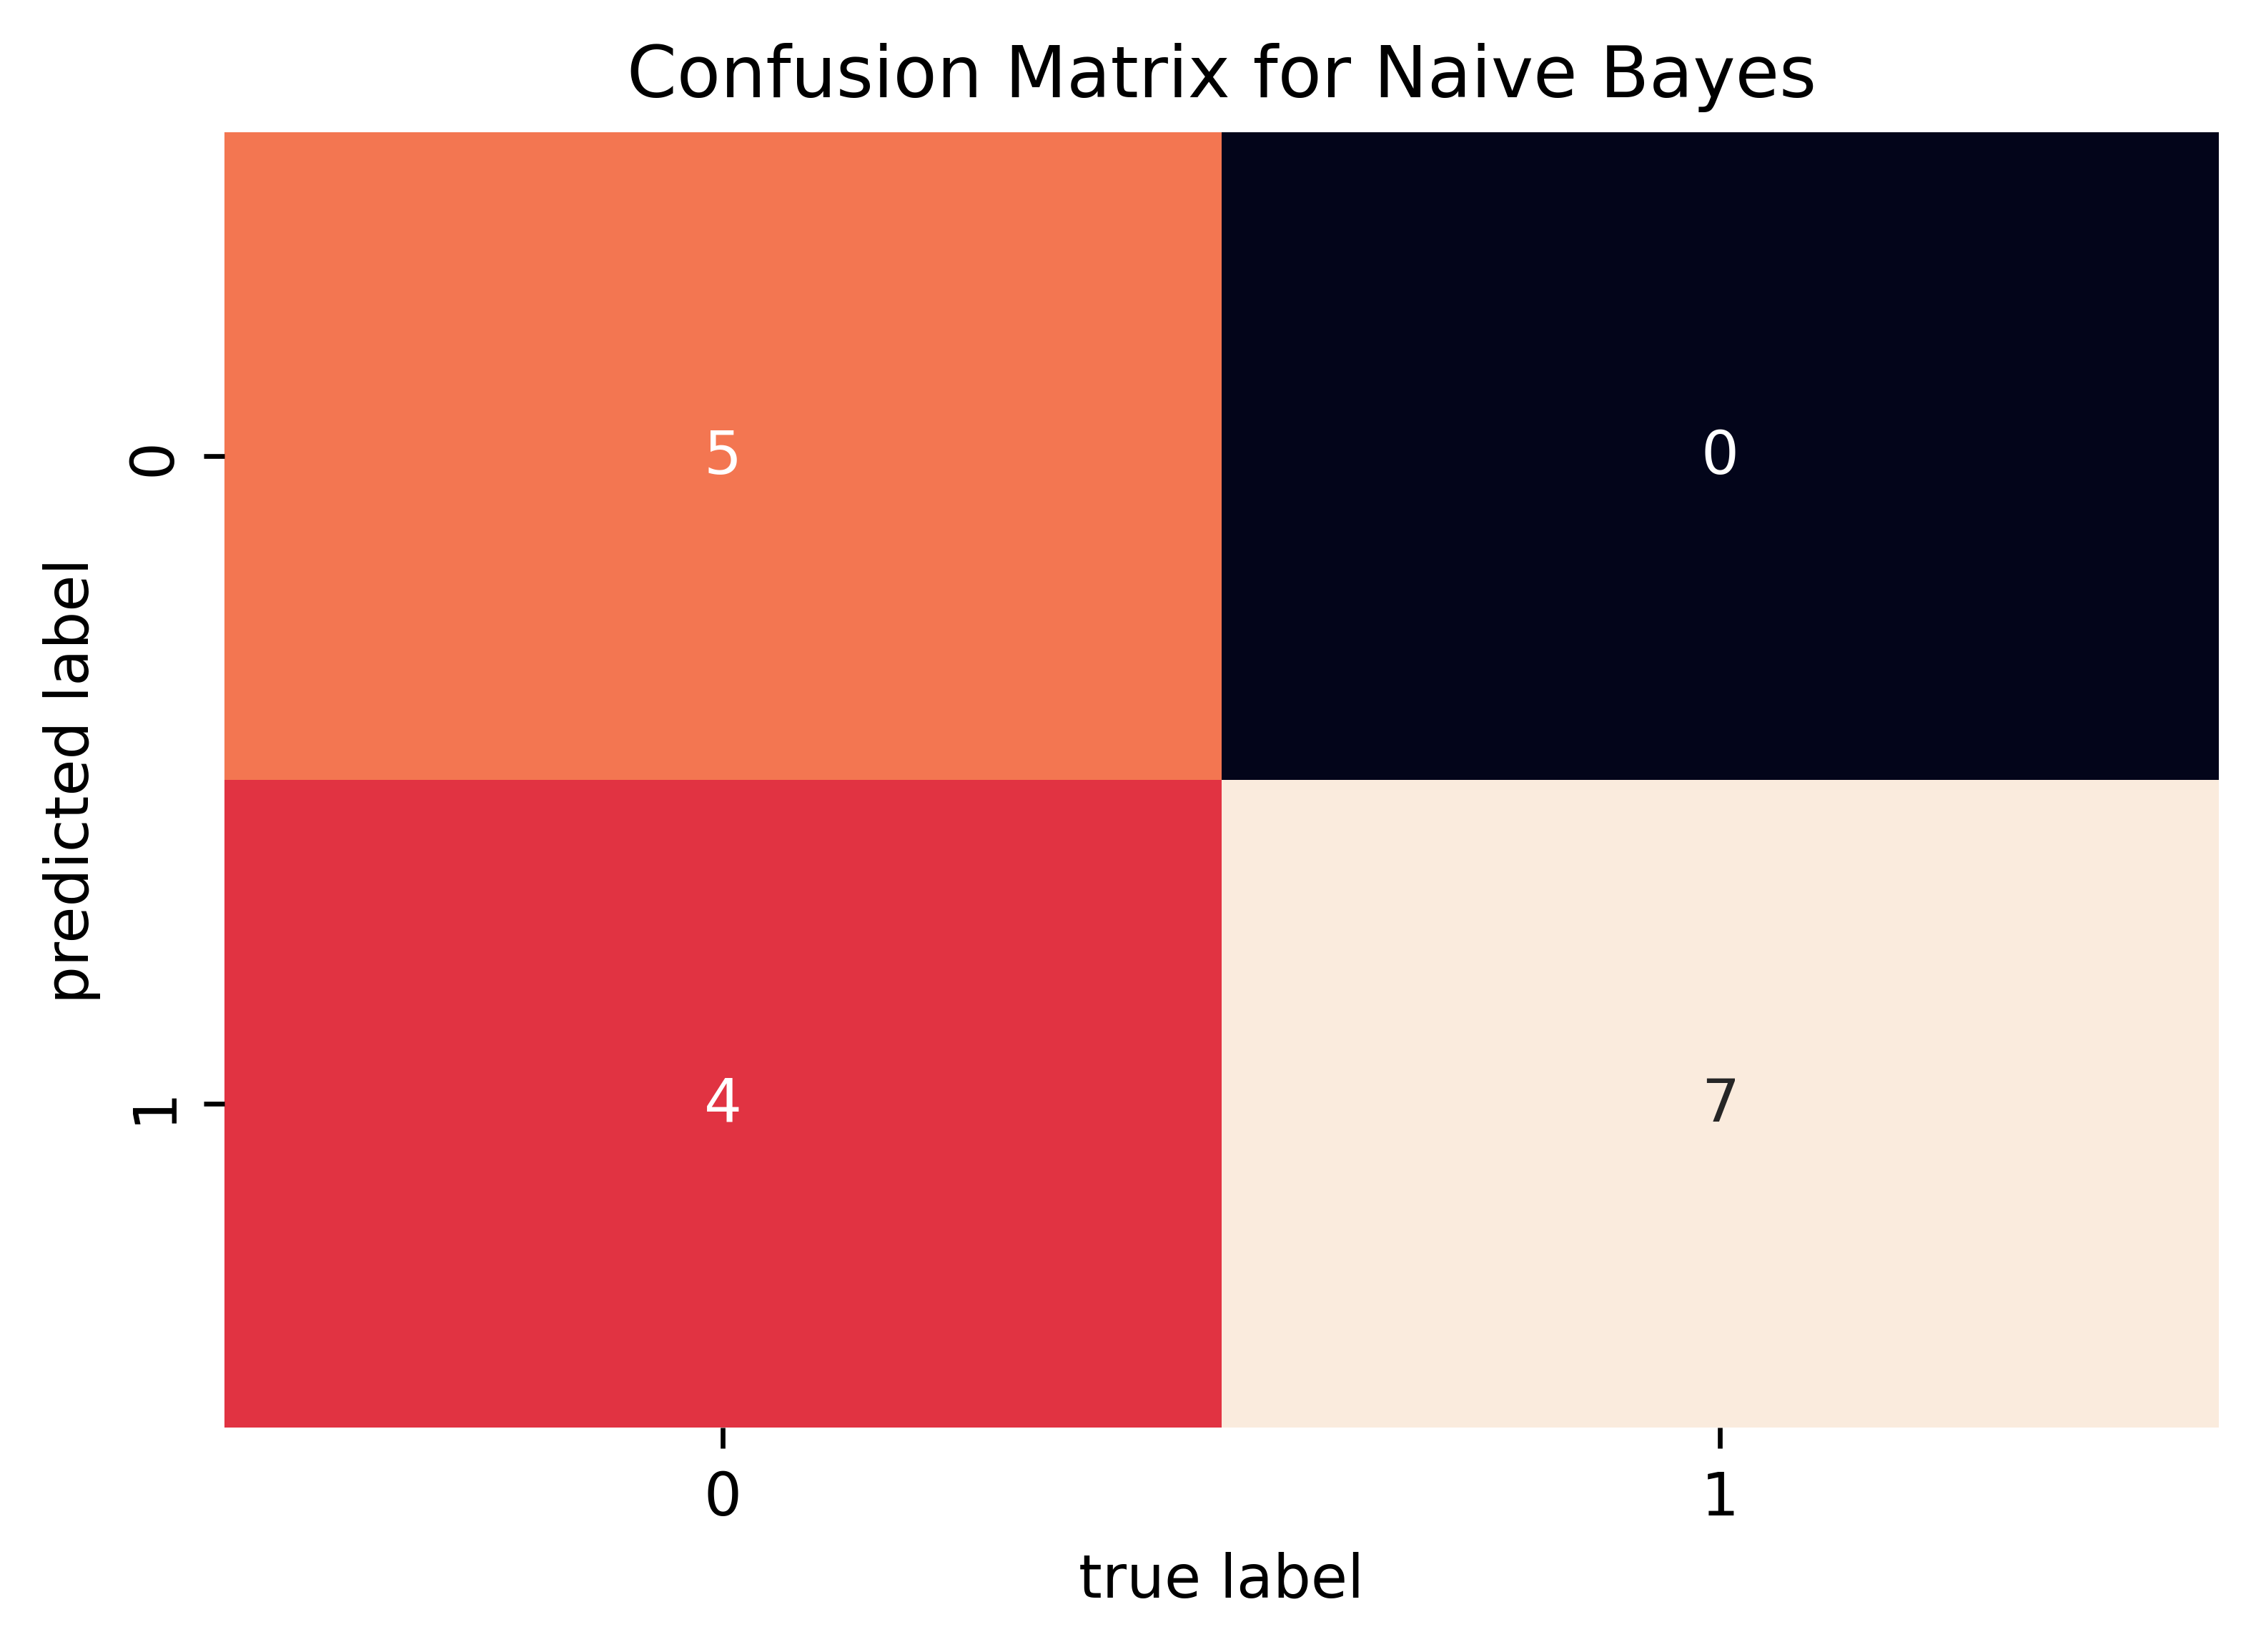

In [143]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [144]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.75


In [145]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_naive))

              precision    recall  f1-score   support

          -1       1.00      0.56      0.71         9
           1       0.64      1.00      0.78         7

    accuracy                           0.75        16
   macro avg       0.82      0.78      0.75        16
weighted avg       0.84      0.75      0.74        16

